# NetworkX 
NetworkX is one of the most frequently used Python packages to create, manipulate, and mine graphs. The package provides classes for graph objects, generators to create standard graphs, IO routines for reading in existing datasets, algorithms to analyze the resulting networks and some basic drawing tools.

In [1]:
import networkx as nx

## 1.Graph
NetworkX provides several classes to store different types of graphs, such as directed and undirected graph. It also provides classes to create multigraphs (both directed and undirected).
For more information, please refer to NetworkX graph types.

In [3]:
# 创建有向图
DG = nx.DiGraph()
DG.is_directed()

True

In [4]:
# 创建无向图
G = nx.Graph()
G.is_directed()

False

In [5]:
# 添加图属性
G.graph['name'] = "Bar"
G.graph

{'name': 'Bar'}

## 2.Node

In [6]:
# 添加单个节点
G.add_node(0, feature = 8.8, label=0)
G.nodes[0]

{'feature': 8.8, 'label': 0}

In [7]:
# 添加批量节点
G.add_nodes_from([
    (1, {'feature': 1, 'label':1}),
    (2, {'feature': 2, 'label':2})
])

# 遍历
# Set data=True will return node attributes
for node in G.nodes(data=True):
    print(node)

(0, {'feature': 8.8, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})


In [8]:
G.nodes()

NodeView((0, 1, 2))

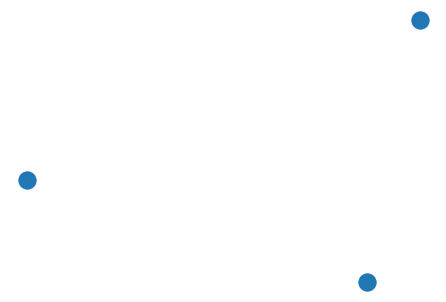

In [9]:
# 可视化
nx.draw(G)

## 3.Edge

In [11]:
# 添加单个边, 设置weight=0.5
G.add_edge(0, 1, weight=0.5)
G.edges[(0, 1)]

{'weight': 0.5}

In [13]:
# 批量添加边，设置属性
G.add_edges_from([
    (1,2,{'weight':0.3}),
    (2,0,{'weight':0.1})
])

# 遍历
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
    print(edge)

(0, 1)
(0, 2)
(1, 2)


In [14]:
# Set data=True will return edge attributes
for edge in G.edges(data=True):
    print(edge)

(0, 1, {'weight': 0.5})
(0, 2, {'weight': 0.1})
(1, 2, {'weight': 0.3})


In [15]:
# 获取边数
G.number_of_edges()

3

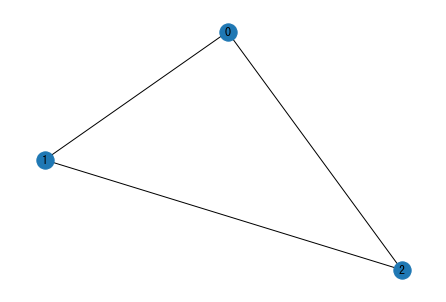

In [19]:
# 可视化
nx.draw(G, with_labels=True)

## 4 Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.

### 4.1 读取案例Zachary's karate club network，并查看

In [20]:
kc = nx.karate_club_graph()
type(kc)

networkx.classes.graph.Graph

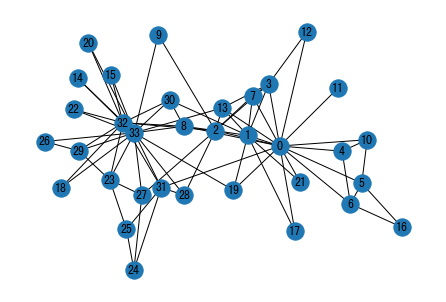

In [21]:
nx.draw(kc, with_labels=True)

In [24]:
kc.nodes(data=True)

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})

In [25]:
kc.edges(data=True)

EdgeDataView([(0, 1, {'weight': 4}), (0, 2, {'weight': 5}), (0, 3, {'weight': 3}), (0, 4, {'weight': 3}), (0, 5, {'weight': 3}), (0, 6, {'weight': 3}), (0, 7, {'weight': 2}), (0, 8, {'weight': 2}), (0, 10, {'weight': 2}), (0, 11, {'weight': 3}), (0, 12, {'weight': 1}), (0, 13, {'weight': 3}), (0, 17, {'weight': 2}), (0, 19, {'weight': 2}), (0, 21, {'weight': 2}), (0, 31, {'weight': 2}), (1, 2, {'weight': 6}), (1, 3, {'weight': 3}), (1, 7, {'weight': 4}), (1, 13, {'weight': 5}), (1, 17, {'weight': 1}), (1, 19, {'weight': 2}), (1, 21, {'weight': 2}), (1, 30, {'weight': 2}), (2, 3, {'weight': 3}), (2, 7, {'weight': 4}), (2, 8, {'weight': 5}), (2, 9, {'weight': 1}), (2, 13, {'weight': 3}), (2, 27, {'weight': 2}), (2, 28, {'weight': 2}), (2, 32, {'weight': 2}), (3, 7, {'weight': 3}), (3, 12, {'weight': 3}), (3, 13, {'weight': 3}), (4, 6, {'weight': 2}), (4, 10, {'weight': 3}), (5, 6, {'weight': 5}), (5, 10, {'weight': 3}), (5, 16, {'weight': 3}), (6, 16, {'weight': 3}), (8, 30, {'weight': 3

### 4.2 使用pagerank算法，计算pr值，并依据pr优化节点大小进行可视化

In [27]:
pr = nx.pagerank(kc, alpha=0.9)
pr

{0: 0.08989893674436585,
 1: 0.059141756707767223,
 2: 0.06546713893617387,
 3: 0.03776716196154615,
 4: 0.019705468540082163,
 5: 0.03323073673197645,
 6: 0.030936182072748605,
 7: 0.02694303155723869,
 8: 0.03436298064785044,
 9: 0.00844083509293145,
 10: 0.01985425224633282,
 11: 0.008720550136496915,
 12: 0.010532814966689313,
 13: 0.03449073324059738,
 14: 0.012181955252433378,
 15: 0.015896132784984984,
 16: 0.01577599518906235,
 17: 0.008629550833547363,
 18: 0.008497554419571018,
 19: 0.01232209818550984,
 20: 0.010324866486157578,
 21: 0.010465009419234037,
 22: 0.012196843602278,
 23: 0.04233469289438073,
 24: 0.01604084197761185,
 25: 0.02902129656859716,
 26: 0.014446190292745742,
 27: 0.027384718109998103,
 28: 0.013907439599646122,
 29: 0.028134519997207407,
 30: 0.023167575769334696,
 31: 0.04294700845239191,
 32: 0.07778494641736763,
 33: 0.09904818416514254}

In [28]:
# 依据pr值对节点排序
spr = sorted(pr.items(), key = lambda x:x[1], reverse=True)
spr

[(33, 0.09904818416514254),
 (0, 0.08989893674436585),
 (32, 0.07778494641736763),
 (2, 0.06546713893617387),
 (1, 0.059141756707767223),
 (31, 0.04294700845239191),
 (23, 0.04233469289438073),
 (3, 0.03776716196154615),
 (13, 0.03449073324059738),
 (8, 0.03436298064785044),
 (5, 0.03323073673197645),
 (6, 0.030936182072748605),
 (25, 0.02902129656859716),
 (29, 0.028134519997207407),
 (27, 0.027384718109998103),
 (7, 0.02694303155723869),
 (30, 0.023167575769334696),
 (10, 0.01985425224633282),
 (4, 0.019705468540082163),
 (24, 0.01604084197761185),
 (15, 0.015896132784984984),
 (16, 0.01577599518906235),
 (26, 0.014446190292745742),
 (28, 0.013907439599646122),
 (19, 0.01232209818550984),
 (22, 0.012196843602278),
 (14, 0.012181955252433378),
 (12, 0.010532814966689313),
 (21, 0.010465009419234037),
 (20, 0.010324866486157578),
 (11, 0.008720550136496915),
 (17, 0.008629550833547363),
 (18, 0.008497554419571018),
 (9, 0.00844083509293145)]

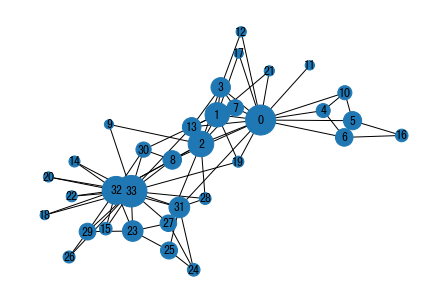

In [29]:
# 根据pr值优化节点大小，进行可视化
nx.draw(kc, node_size = [_ * 10000 for _ in pr.values()], with_labels=True)